In [1]:
dsp_f = '/fpiprd1/fpishare/Conrad/Yuggoth/mms1_dsp_fast_l2_epsd_20170608_v0.6.3.cdf'
dsp   = pycdf.CDF(dsp_f)
dsp_Epoch = np.asarray(dsp['Epoch'])
dsp_freq  = np.asarray(dsp['mms1_e_freq'][:])
dsp_omni  = np.ma.masked_invalid(np.log10(np.asarray(dsp['mms1_dsp_epsd_omni']))).T

/opt/fpi/anaconda2_4.4.0/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


In [2]:
epoch_strings = ['20170608133933',
                 '20170608134133',
                 '20170608134403',
                 '20170608134623',
                 '20170608134853',
                 '20170608135003',
                 '20170608135133',
                 '20170608135353',
                 '20170608135623',
                 '20170608135803',
                 '20170608135943',
                 '20170608140143',
                 '20170608140353',
                 '20170608140603',
                 '20170608140813',
                 '20170608141033',
                 '20170608141243',
                 '20170608141453',
                 '20170608141703',
                 '20170608141923',
                 '20170608142133',
                 '20170608142303',
                 '20170608143333',
                 '20170608143453']
                 
dis_pre  = 'mms1_fpi_brst_l2_dis-debug_'
dis_post = '_v3.2.0.cdf'
fgm_pre  = 'mms1_fgm_brst_l2_'
fgm_post = '_v5.92.0.cdf'

dis_brst_path = '/fpiprd1/data/ftp/mms1/fpi/brst/l2/dis-debug/2017/06/08/'
fgm_brst_path = '/fpiprd1/data/ftp/mms1/fgm/brst/l2/2017/06/08/'

In [3]:
def make_brst_struct():
    
    bs = {'dis_Epoch'   : np.array([]),
          'dis_Energy'  : np.array([]),
          'fgm_Epoch'   : np.array([]),
          'b_gse_brst'  : np.array([]),
          'pos_gse'     : np.array([]),
          'sc_pot'      : np.array([]),
          'energy_spec' : np.array([]),
          'bulk_v'      : np.array([])}

    return bs

In [4]:
def pack_brst_struct(fpi,mag,obs,species):
    bs      = make_brst_struct()
    fpi_pre = '%s_%s_' % (obs,species)
    mag_pre = '%s_'    % (obs,)
    
    bs['dis_Epoch']   = np.asarray(fpi['Epoch'])
    bs['dis_Energy']  = np.asarray(fpi[fpi_pre+'energy_brst'])
    bs['pos_gse']     = np.asarray(fpi[fpi_pre+'pos_gse'])
    bs['sc_pot']      = np.asarray(fpi[fpi_pre+'scpot_mean_brst'])
    bs['energy_spec'] = np.asarray(fpi[fpi_pre+'energyspectr_omni_brst'])
    bs['bulk_v']      = np.asarray(fpi[fpi_pre+'bulkv_gse_brst'])

    bs['fgm_Epoch']   = np.asarray(mag['Epoch'])
    bs['b_gse_brst']  = np.asarray(mag[mag_pre+'fgm_b_gse_brst_l2'])    

    return bs   

In [5]:
###############################################################################
def cbar_position(current_ax,offset,cbar_width):
    #get the tuple describing the lower x,y corner position
    #and the width and height
    x_pos, y_pos, width, height = current_ax.get_position().bounds
    return [x_pos + width + offset, y_pos, cbar_width, height]

###############################################################################
def quiet_axis(ax):
    #ax.set_axis_bgcolor('none')
    ax.set_facecolor('none')
    ax.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')


In [6]:
obs     = 'mms1'
species = 'dis'
counter = 0
data    = []
for e in epoch_strings:
    dis_f = dis_brst_path+dis_pre+e+dis_post
    fgm_f = fgm_brst_path+fgm_pre+e+fgm_post
    dis   = pycdf.CDF(dis_f)
    fgm   = pycdf.CDF(fgm_f)
    temp   = pack_brst_struct(dis,fgm,'mms1','dis')
    data.append(temp)
    print str(counter)+'-',
    counter += 1
    dis.close()
    fgm.close()

0- 1- 2- 3- 4- 5- 6- 7- 8- 9- 10- 11- 12- 13- 14- 15- 16- 17- 18- 19- 20- 21- 22- 23-


/opt/fpi/anaconda2_4.4.0/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in log10


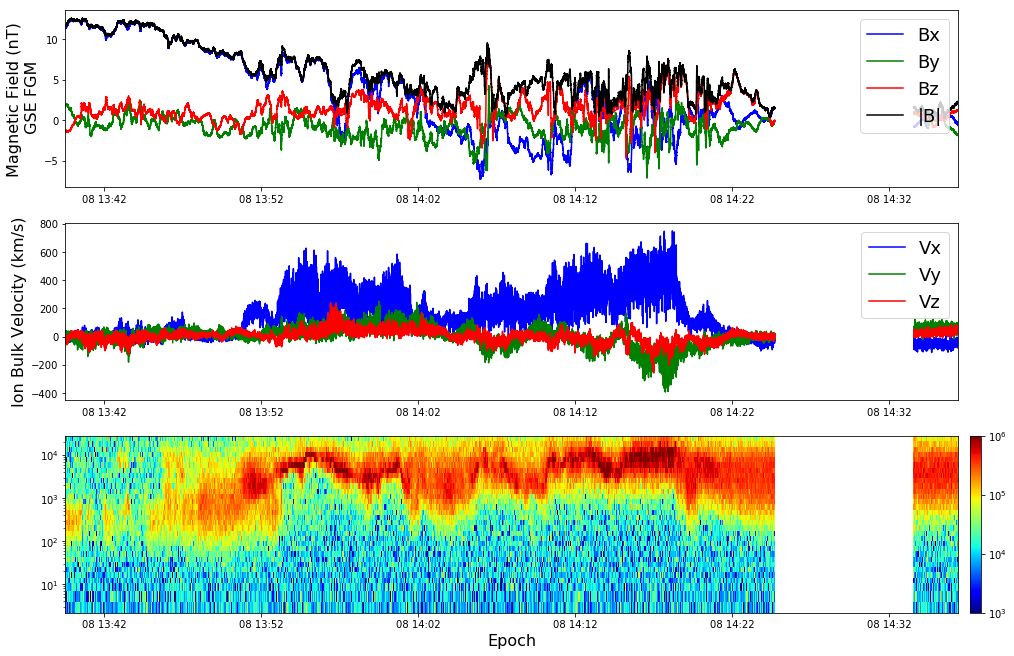

In [10]:
fig0   = plt.figure(figsize=(16,15))
ax10   = fig0.add_subplot(4,1,1)
ax20   = fig0.add_subplot(4,1,2,sharex=ax10)
ax30   = fig0.add_subplot(4,1,3,sharex=ax10)
flag  = 0
for d in data:
    if flag == 0:
        ax10.plot(d['fgm_Epoch'],d['b_gse_brst'][:,0],'b-',label='Bx')
        ax10.plot(d['fgm_Epoch'],d['b_gse_brst'][:,1],'g-',label='By')
        ax10.plot(d['fgm_Epoch'],d['b_gse_brst'][:,2],'r-',label='Bz')
        ax10.plot(d['fgm_Epoch'],d['b_gse_brst'][:,3],'k-',label='|B|')        
        ax20.plot(d['dis_Epoch'],d['bulk_v'][:,0],'b-',label='Vx')
        ax20.plot(d['dis_Epoch'],d['bulk_v'][:,1],'g-',label='Vy')
        ax20.plot(d['dis_Epoch'],d['bulk_v'][:,2],'r-',label='Vz')
        flag = 1
    else:
        ax10.plot(d['fgm_Epoch'],d['b_gse_brst'][:,0],'b-')
        ax10.plot(d['fgm_Epoch'],d['b_gse_brst'][:,1],'g-')
        ax10.plot(d['fgm_Epoch'],d['b_gse_brst'][:,2],'r-')
        ax10.plot(d['fgm_Epoch'],d['b_gse_brst'][:,3],'k-')        
        ax20.plot(d['dis_Epoch'],d['bulk_v'][:,0],'b-')
        ax20.plot(d['dis_Epoch'],d['bulk_v'][:,1],'g-')
        ax20.plot(d['dis_Epoch'],d['bulk_v'][:,2],'r-')
    cb30patch = ax30.pcolormesh(d['dis_Epoch'],\
                                d['dis_Energy'][0][0:32],\
                                np.ma.masked_invalid(np.log10(d['energy_spec'].T)),\
                                cmap=cmap.jet,\
                                shading='flat',
                                vmin = 3,
                                vmax = 6)
cbax30 = fig0.add_axes(cbar_position(ax30,0.01,0.01))
fig0.colorbar(cb30patch,\
              cax=cbax30,\
              ticks=[3,4,5,6],\
              format=ticker.FormatStrFormatter('$10^{%d}$'))
ax10.set_ylabel('Magnetic Field (nT)\n GSE FGM',fontsize=16)
ax20.set_ylabel('Ion Bulk Velocity (km/s)',fontsize=16)
ax10.legend(fontsize=18)    
ax20.legend(fontsize=18)    
ax30.set_yscale('log')        
ax30.set_xlabel('Epoch',fontsize=16)
plt.show()    

/opt/fpi/anaconda2_4.4.0/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in log10


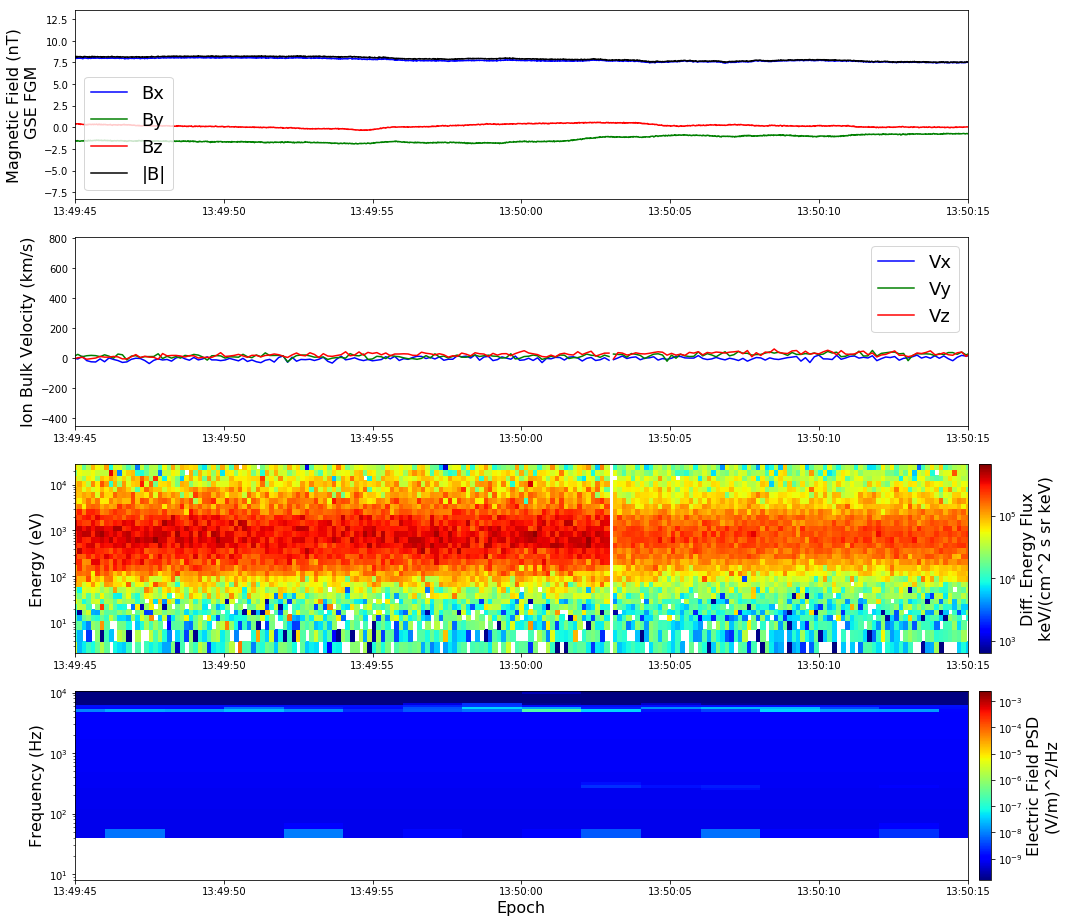

In [32]:
start = mpl.dates.date2num(dt.datetime(2017,6,8,13,49,45))
stop  = mpl.dates.date2num(dt.datetime(2017,6,8,13,50,15))
fig  = plt.figure(figsize=(16,16))
ax1  = fig.add_subplot(4,1,1)
ax2  = fig.add_subplot(4,1,2,sharex=ax1)
ax3  = fig.add_subplot(4,1,3,sharex=ax1)
ax4  = fig.add_subplot(4,1,4,sharex=ax1)
flag = 0
for d in data:
    if flag == 0:
        ax1.plot(d['fgm_Epoch'],d['b_gse_brst'][:,0],'b-',label='Bx')
        ax1.plot(d['fgm_Epoch'],d['b_gse_brst'][:,1],'g-',label='By')
        ax1.plot(d['fgm_Epoch'],d['b_gse_brst'][:,2],'r-',label='Bz')
        ax1.plot(d['fgm_Epoch'],d['b_gse_brst'][:,3],'k-',label='|B|')        
        ax2.plot(d['dis_Epoch'],d['bulk_v'][:,0],'b-',label='Vx')
        ax2.plot(d['dis_Epoch'],d['bulk_v'][:,1],'g-',label='Vy')
        ax2.plot(d['dis_Epoch'],d['bulk_v'][:,2],'r-',label='Vz')
        flag = 1
    else:
        ax1.plot(d['fgm_Epoch'],d['b_gse_brst'][:,0],'b-')
        ax1.plot(d['fgm_Epoch'],d['b_gse_brst'][:,1],'g-')
        ax1.plot(d['fgm_Epoch'],d['b_gse_brst'][:,2],'r-')
        ax1.plot(d['fgm_Epoch'],d['b_gse_brst'][:,3],'k-')        
        ax2.plot(d['dis_Epoch'],d['bulk_v'][:,0],'b-')
        ax2.plot(d['dis_Epoch'],d['bulk_v'][:,1],'g-')
        ax2.plot(d['dis_Epoch'],d['bulk_v'][:,2],'r-')
    cbpatch3 = ax3.pcolormesh(d['dis_Epoch'],\
                              d['dis_Energy'][0][0:32],\
                              np.ma.masked_invalid(np.log10(d['energy_spec'].T)),\
                              cmap=cmap.jet,\
                              shading='flat')#'gouraud')
xmin,xmax = ax1.get_xlim()   

cbpatch4 = ax4.pcolormesh(dsp_Epoch,dsp_freq,dsp_omni,cmap=cmap.jet)

cb3ax = fig.add_axes(cbar_position(ax3,0.01,0.01))
cb4ax = fig.add_axes(cbar_position(ax4,0.01,0.01))

fig.colorbar(cbpatch3,cax=cb3ax,ticks=[3,4,5,6],format=ticker.FormatStrFormatter('$10^{%d}$'))
fig.colorbar(cbpatch4,cax=cb4ax,format=ticker.FormatStrFormatter('$10^{%d}$'))

ax1.set_ylabel('Magnetic Field (nT)\n GSE FGM',fontsize=16)
ax1.legend(fontsize=18)    
ax1.set_xlim([start,stop])

ax2.set_ylabel('Ion Bulk Velocity (km/s)',fontsize=16)
ax2.legend(fontsize=18)    
ax2.set_xlim([start,stop])

ax3.set_yscale('log')        
ax3.set_ylabel('Energy (eV)',fontsize=16)
cb3ax.set_ylabel('Diff. Energy Flux\nkeV/(cm^2 s sr keV)',fontsize=16)
ax3.set_xlim([start,stop])

ax4.set_yscale('log')
ax4.set_ylim([dsp_freq[0],dsp_freq[58]])
ax4.set_xlabel('Epoch',fontsize=16)
ax4.set_ylabel('Frequency (Hz)',fontsize=16)
cb4ax.set_ylabel('Electric Field PSD\n(V/m)^2/Hz',fontsize=16)
ax4.set_xlim([xmin,xmax])
ax4.set_xlim([start,stop])

plt.show()   

In [21]:
fig.savefig('/home/cschiff/../../fpishare/Conrad/June_08_2017_case_1353_1403.png',dpi=200)

In [35]:
print data[4]['dis_Epoch'][0]
print data[4]['dis_Epoch'][-1]
print data[5]['dis_Epoch'][0]
print data[5]['dis_Epoch'][-1]
print ( data[5]['dis_Epoch'][0] - data[4]['dis_Epoch'][-1] ).total_seconds()

2017-06-08 13:48:53.044260
2017-06-08 13:50:02.944623
2017-06-08 13:50:03.094629
2017-06-08 13:51:32.795097
0.150006


In [38]:
temp = pycdf.CDF(dis_f)

In [41]:
temp['mms1_dis_energy_brst'][0,:]

array([  2.16000009e+00,   3.91000009e+00,   7.07000017e+00,
         1.09300003e+01,   1.44700003e+01,   1.91599998e+01,
         2.53700008e+01,   3.35900002e+01,   4.44799995e+01,
         5.88899994e+01,   7.79800034e+01,   1.03239998e+02,
         1.36699997e+02,   1.80990005e+02,   2.39630005e+02,
         3.17279999e+02,   4.20089996e+02,   5.56219971e+02,
         7.36450012e+02,   9.75080017e+02,   1.29103003e+03,
         1.70937000e+03,   2.26326001e+03,   2.99662012e+03,
         3.96762012e+03,   5.25324023e+03,   6.95545996e+03,
         9.20924023e+03,   1.21933096e+04,   1.61443096e+04,
         2.13755605e+04,   2.83018906e+04], dtype=float32)

In [12]:
len(data[0]['dis_Epoch'])

800